In [46]:
import psycopg2


params = {
  'dbname': 'gplates',
  'user': 'gplates',
  'password': 'zaq12wsx',
  'host': '127.0.0.1',
  'port': 5432
}

conn = psycopg2.connect(**params)
cur = conn.cursor()

sql = """SELECT ST_AsGDALRaster(rast, 'PNG', ARRAY['COMPRESS=LZW']) FROM public.age_grid ;"""
cur.execute(sql)
data = cur.fetchall()

tif_data = data[0][0] #This can passed as the data variable in the requests.put function
with open("/Users/mchin/Downloads/pg_raster.png", "wb") as f:
    f.write(tif_data)

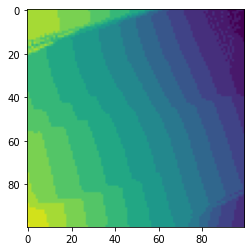

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

with open("tmp.png", "wb") as f:
    f.write(data[200][0])
    
img = mpimg.imread("tmp.png")

#print(len(data))
plt.imshow(img)

In [51]:
from io import StringIO
import matplotlib.image as mpimg
img = mpimg.imread(StringIO(data[0][0]))
plt.imshow(img)


TypeError: initial_value must be str or None, not memoryview